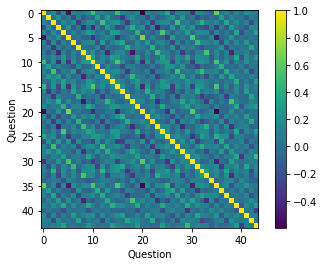

0.5235329521001042
0.521780303030303
1.0
0.16666666666666666


In [2]:
import numpy as np
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#kxfvgjkshdfvjkn
# 0. Init
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split

#median split: 
data = pd.read_csv('movieReplicationSet.csv')

movieRatings=data.iloc[0:,0:400]
sensationSeek=data.iloc[0:,400:420]
personality=data.iloc[0:,420:464]
movieExperience=data.iloc[0:,464:474]
gender=data.iloc[0:,474]
onlyChild=data.iloc[0:,475]
socialViewPref=data.iloc[0:,476]
data.shape

import random  
random.seed()
personality = data.iloc[:,420:464]
personality=personality.dropna()
personaInd = personality.index


corrMatrix = np.corrcoef(personality,rowvar=False)
plt.imshow(corrMatrix)
plt.xlabel('Question')
plt.ylabel('Question')
plt.colorbar()
plt.show()

#PCA

zscoredData = stats.zscore(personality)
pca = PCA().fit(zscoredData)
eigVals = pca.explained_variance_
loadings = pca.components_*-1
rotatedData = pca.fit_transform(zscoredData)*-1
covarExplained = eigVals/sum(eigVals)*100

label=movieRatings.columns
rotatedP=pd.DataFrame(rotatedData[:,0:8])

RFCModelAccuracy=[]

for i in range(400):
    rotatedP=pd.DataFrame(rotatedData[:,0:8])
    y=movieRatings.iloc[:,i]
    med=y.median()
    
    dropIndex=y.drop(index=personaInd).index
    y=y.drop(dropIndex)
    
    combined=pd.concat([y,rotatedP],axis=1).reset_index().drop(['index'],axis=1)
    combined.loc[(combined[label[i]] < med), label[i]] = 0 # Order for this matters
    combined.loc[(combined[label[i]] > med), label[i]] = 1 # Order for this matters
    
    combined=combined.where(combined[label[i]]!=med)
    
    combined=combined.dropna()
    
    y=combined[label[i]].to_numpy()
    x=combined.drop(label[i],axis=1).to_numpy()

    xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size=0.20,random_state=0)
   
    rfcmodel=RandomForestClassifier(n_estimators=100).fit(xTrain,yTrain)
    rfcPredictions=rfcmodel.predict(xTest)
    
    modelAccuracy=accuracy_score(yTest,rfcPredictions)
    RFCModelAccuracy.append(modelAccuracy)

print(np.mean(RFCModelAccuracy))
print(np.median(RFCModelAccuracy))
print(np.max(RFCModelAccuracy))
print(np.min(RFCModelAccuracy))



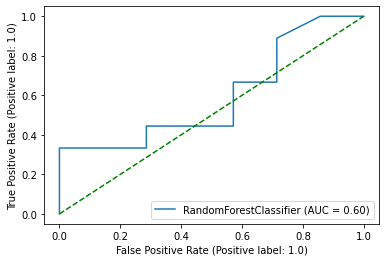

In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm

metrics.plot_roc_curve(rfcmodel,xTest,yTest)
plt.plot([0,1],[0,1],'g--')
plt.show()



Question 9 : Build a prediction model of your choice (regression or supervised learning) to predict movie
ratings (for all 400 movies) from gender identity, sibship status and social viewing preferences (columns 475-477) only. Make sure to use cross-validation methods to avoid overfitting and characterize the accuracy of your model.

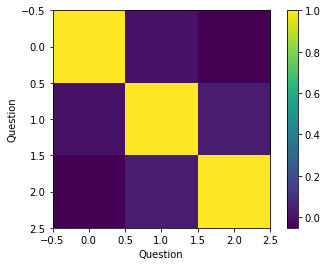

35.268
33.396
31.335


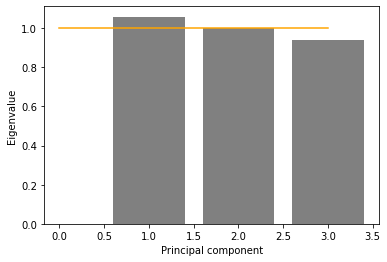

Text(0.5, 1.0, 'PC1')

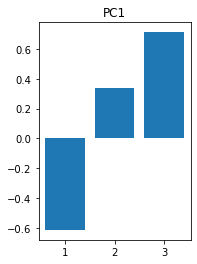

In [13]:
#median split: 
data = pd.read_csv('movieReplicationSet.csv')

movieRatings=data.iloc[0:,0:400]
sensationSeek=data.iloc[0:,400:420]
personality=data.iloc[0:,420:464]
movieExperience=data.iloc[0:,464:474]
gender=data.iloc[0:,474]
onlyChild=data.iloc[0:,475]
socialViewPref=data.iloc[0:,476]
data.shape


data = pd.read_csv('movieReplicationSet.csv')

gender=data.iloc[0:,474]
onlyChild=data.iloc[0:,475]
socialViewPref=data.iloc[0:,476]

combinedData=pd.concat([gender,onlyChild,socialViewPref],axis=1).dropna()
predictInd=combinedData.index

corrMatrix = np.corrcoef(combinedData,rowvar=False)
plt.imshow(corrMatrix)
plt.xlabel('Question')
plt.ylabel('Question')
plt.colorbar()
plt.show()

#PCA

zscoredData = stats.zscore(combinedData)
pca = PCA().fit(zscoredData)
eigVals = pca.explained_variance_
loadings = pca.components_*-1
rotatedData = pca.fit_transform(zscoredData)*-1
covarExplained = eigVals/sum(eigVals)*100
                       
for ii in range(len(covarExplained)):
    print(covarExplained[ii].round(3))

#SCreeplot
numQuestion = 3
x = np.linspace(1,numQuestion,numQuestion)
plt.bar(x, eigVals, color='grey')
plt.plot([0,numQuestion],[1,1],color='orange') # Orange Kaiser criterion line for the fox
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()
#the index starts from 0 but nxn so it's 1 
#in loadings matrix index is 0.


#plot pca
plt.subplot(1,2,1) # Factor 1: 
plt.bar(np.linspace(1,numQuestion,numQuestion),loadings[0,:]) # "Turmoil" #0th columns of loading which is pc1 
plt.title('PC1')


In [5]:

label=movieRatings.columns
rotatedP=pd.DataFrame(rotatedData[:,0:1])

RFCModelAccuracy=[]

for i in range(400):
    rotatedP=pd.DataFrame(rotatedData[:,0:1])
    y=movieRatings.iloc[:,i]
    med=y.median()
    
    dropIndex=y.drop(index=predictInd).index
    y=y.drop(dropIndex)
    
    combined=pd.concat([y,rotatedP],axis=1).reset_index().drop(['index'],axis=1)
    combined.loc[(combined[label[i]] < med), label[i]] = 0 # Order for this matters
    combined.loc[(combined[label[i]] > med), label[i]] = 1 # Order for this matters
    
    combined=combined.where(combined[label[i]]!=med)
    
    combined=combined.dropna()
    
    y=combined[label[i]].to_numpy()
    x=combined.drop(label[i],axis=1).to_numpy()

    xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size=0.20,random_state=0)
   
    rfcmodel=RandomForestClassifier(n_estimators=100).fit(xTrain,yTrain)
    rfcPredictions=rfcmodel.predict(xTest)
    
    modelAccuracy=accuracy_score(yTest,rfcPredictions)
    RFCModelAccuracy.append(modelAccuracy)

print(np.mean(RFCModelAccuracy))
print(np.median(RFCModelAccuracy))
print(np.max(RFCModelAccuracy))
print(np.min(RFCModelAccuracy))

0.5270835163827595
0.5304576376004948
1.0
0.09090909090909091


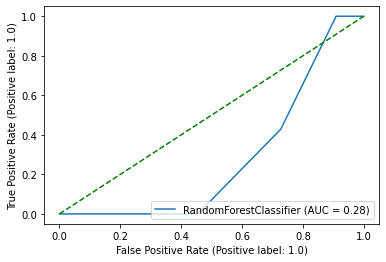

In [6]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm

metrics.plot_roc_curve(rfcmodel,xTest,yTest)
plt.plot([0,1],[0,1],'g--')
plt.show()

Question 10: Build a prediction model of your choice (regression or supervised learning) to predict movie ratings (for all 400 movies) from all available factors that are not movie ratings (columns 401- 477). Make sure to use cross-validation methods to avoid overfitting and characterize the accuracy of your model.

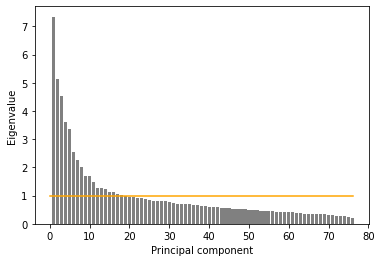

In [7]:
#median split: 

data = pd.read_csv('movieReplicationSet.csv')
movieRatings=data.iloc[0:,0:400]
sensationSeek=data.iloc[0:,400:420]
personality=data.iloc[0:,420:464]
movieExperience=data.iloc[0:,464:474]
gender=data.iloc[0:,474]
onlyChild=data.iloc[0:,475]
socialViewPref=data.iloc[0:,476]

predictors =data.iloc[:,400:476].dropna()
predictInd=predictors.index


#PCA

zscoredData = stats.zscore(predictors)
pca = PCA().fit(zscoredData)
eigVals = pca.explained_variance_
loadings = pca.components_*-1
rotatedData = pca.fit_transform(zscoredData)*-1
covarExplained = eigVals/sum(eigVals)*100


#SCreeplot
numQuestion = predictors.shape[1]
x = np.linspace(1,numQuestion,numQuestion)
plt.bar(x, eigVals, color='grey')
plt.plot([0,numQuestion],[1,1],color='orange') # Orange Kaiser criterion line for the fox
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()
#the index starts from 0 but nxn so it's 1 
#in loadings matrix index is 0.


In [8]:
threshold = 1
print('Number of factors selected by Kaiser criterion:', np.count_nonzero(eigVals > threshold))

Number of factors selected by Kaiser criterion: 18


In [9]:

label=movieRatings.columns
rotatedP=pd.DataFrame(rotatedData[:,0:18])

RFCModelAccuracy=[]

for i in range(400):
    rotatedP=pd.DataFrame(rotatedData[:,0:18])
    y=movieRatings.iloc[:,i]
    med=y.median()
    
    dropIndex=y.drop(index=predictInd).index
    y=y.drop(dropIndex)
    
    combined=pd.concat([y,rotatedP],axis=1).reset_index().drop(['index'],axis=1)
    combined.loc[(combined[label[i]] < med), label[i]] = 0 # Order for this matters
    combined.loc[(combined[label[i]] > med), label[i]] = 1 # Order for this matters
    
    combined=combined.where(combined[label[i]]!=med)
    
    combined=combined.dropna()
    
    y=combined[label[i]].to_numpy()
    x=combined.drop(label[i],axis=1).to_numpy()

    xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size=0.20,random_state=0)
   
    rfcmodel=RandomForestClassifier(n_estimators=100).fit(xTrain,yTrain)
    rfcPredictions=rfcmodel.predict(xTest)
    
    modelAccuracy=accuracy_score(yTest,rfcPredictions)
    RFCModelAccuracy.append(modelAccuracy)

print(np.mean(RFCModelAccuracy))
print(np.median(RFCModelAccuracy))
print(np.max(RFCModelAccuracy))
print(np.min(RFCModelAccuracy))

0.5333545680427255
0.5278637770897833
1.0
0.125


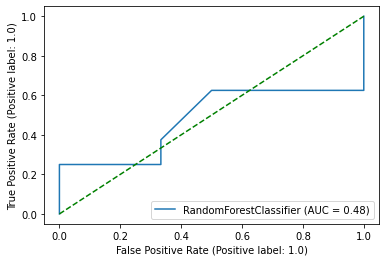

In [10]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm

metrics.plot_roc_curve(rfcmodel,xTest,yTest)
plt.plot([0,1],[0,1],'g--')
plt.show()

Extra Credit 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
# 0. Init
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.cluster import DBSCAN


data = pd.read_csv('movieReplicationSet.csv')
#print(data.columns)
print(data.shape)
data.head()

(1097, 477)


,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1


In [3]:
#Loading data :
data = pd.read_csv('movieReplicationSet.csv')

movieRatings=data.iloc[0:,0:400]
sensationSeek=data.iloc[0:,400:420]
personality=data.iloc[0:,420:464]
movieExperience=data.iloc[0:,464:474]
gender=data.iloc[0:,474]
onlyChild=data.iloc[0:,475]
socialViewPref=data.iloc[0:,476]
data.shape

(1097, 477)

In [5]:
# from 2 groups
data = pd.read_csv('movieReplicationSet.csv')

wolf=movieRatings['The Wolf of Wall Street (2013)']
socialViewPref=data.iloc[0:,475]

combinedData=pd.concat([wolf,socialViewPref],axis=1)
combinedData=combinedData.dropna()
print(combinedData)


alone=combinedData.loc[combinedData.iloc[:,1]==1]
socially=combinedData.loc[combinedData.iloc[:,1]==0]

print(alone)
print(socially)

u1,p1 = stats.mannwhitneyu(alone.iloc[:,0],socially.iloc[:,0])
print(u1,round(p1,6),sep='\n')

      The Wolf of Wall Street (2013)  \
3                                4.0   
4                                3.0   
5                                2.5   
6                                1.0   
7                                3.5   
...                              ...   
1087                             4.0   
1090                             4.0   
1093                             3.5   
1094                             2.0   
1096                             4.0   

      Are you an only child? (1: Yes; 0: No; -1: Did not respond)  
3                                                     0            
4                                                     1            
5                                                     1            
6                                                     0            
7                                                     0            
...                                                 ...            
1087                                       